In [34]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [35]:
df = pd.read_csv('timeseries.csv')


In [36]:
df = df.dropna(subset=['time']) 
df['time'].tail(20)
# df['time'][78886]

96418                                        20201231:1007
96419                                        20201231:1107
96420                                        20201231:1207
96421                                        20201231:1307
96422                                        20201231:1407
96423                                        20201231:1507
96424                                        20201231:1607
96425                                        20201231:1707
96426                                        20201231:1807
96427                                        20201231:1907
96428                                        20201231:2007
96429                                        20201231:2107
96430                                        20201231:2207
96431                                        20201231:2307
96433    G(i): Global irradiance on the inclined plane ...
96434                           H_sun: Sun height (degree)
96435            T2m: 2-m air temperature (degree Celsiu

In [37]:
df = df[:96431:]
df_multi = df.iloc[:,1:5] # removing the time column 
df.tail(30)
print(df_multi.head(10))
# y = [x for x in df['Int'] if x == 0.0]
# print(y)
# type(df_multi)


      G(i)  H_sun    T2m  WS10m
0        0   0.00  11.17   1.59
1        0   0.00  10.67   1.59
2        0   0.00  10.11   1.79
3        0   0.00   9.88   1.86
4    91.98   2.76   9.77   1.93
5   432.28  15.67  11.48   1.72
6   681.34  27.82  15.42   1.72
7   867.69  38.65  19.13   1.72
8   987.62  47.15  21.08   1.66
9  1034.38  51.71  22.13   1.24


In [38]:
# Initialize the Min-Max Scaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(df_multi)
print(scaled_data.shape)
print(scaled_data[1:10,:])

(96431, 4)
[[0.         0.         0.15526224 0.26194399]
 [0.         0.         0.13581105 0.29489292]
 [0.         0.         0.12782216 0.30642504]
 [0.07973716 0.03197405 0.12400139 0.31795717]
 [0.3747421  0.18153383 0.18339701 0.28336079]
 [0.59065139 0.32228916 0.32025009 0.28336079]
 [0.75219758 0.44775255 0.44911428 0.28336079]
 [0.8561645  0.54622335 0.51684613 0.27347611]
 [0.89670059 0.59905005 0.55331712 0.20428336]]


In [39]:
df_orignal_scaled = scaled_data
df_orignal = df_multi
df_scaled = scaled_data[:78888:]

In [40]:

print(df_scaled[0:5,:]) # this it the input
print(df_scaled[5,:]) # this is the output

[[0.         0.         0.17262939 0.26194399]
 [0.         0.         0.15526224 0.26194399]
 [0.         0.         0.13581105 0.29489292]
 [0.         0.         0.12782216 0.30642504]
 [0.07973716 0.03197405 0.12400139 0.31795717]]
[0.3747421  0.18153383 0.18339701 0.28336079]


In [41]:
def df_to_X_y(df_as_np, window_size=5):
#   df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [a for a in df_as_np[i:i+window_size,:]]
    X.append(row)
    label = df_as_np[i+window_size,:]
    y.append(label)
  return np.array(X), np.array(y)

In [42]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(df_scaled, WINDOW_SIZE)
print(X1[1])
print("slfejlksdjlfkjdslkjfjlk")
print(y1[1])
X1.shape, y1.shape

[[0.         0.         0.15526224 0.26194399]
 [0.         0.         0.13581105 0.29489292]
 [0.         0.         0.12782216 0.30642504]
 [0.07973716 0.03197405 0.12400139 0.31795717]
 [0.3747421  0.18153383 0.18339701 0.28336079]]
slfejlksdjlfkjdslkjfjlk
[0.59065139 0.32228916 0.32025009 0.28336079]


((78883, 5, 4), (78883, 4))

In [43]:
X_train1, y_train1 = X1[:61367], y1[:61367]
X_val1, y_val1 = X1[61367:70127], y1[61367:70127] # 1 year for validation [61,367 , 70127]
X_test1, y_test1 = X1[70128:], y1[70128:] #  1 year testing [70,128 , 78887]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape


((61367, 5, 4), (61367, 4), (8760, 5, 4), (8760, 4), (8755, 5, 4), (8755, 4))

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 4)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(4, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17664     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
Total params: 18,220
Trainable params: 18,220
Non-trainable params: 0
_________________________________________________________________


In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, verbose=1, mode='min')

In [47]:
cp1 = ModelCheckpoint('model_multi_2/', save_best_only=True)
# metrics , learning rate, loss  can be changed 
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [48]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, callbacks=[cp1,early_stopping])

Epoch 1/50
1905/1918 [============================>.] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.0887

INFO:tensorflow:Assets written to: model_multi_2\assets


INFO:tensorflow:Assets written to: model_multi_2\assets


1918/1918 [==============================] - 18s 8ms/step - loss: 0.0078 - root_mean_squared_error: 0.0886 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0621
Epoch 2/50
1918/1918 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0562

INFO:tensorflow:Assets written to: model_multi_2\assets


INFO:tensorflow:Assets written to: model_multi_2\assets


1918/1918 [==============================] - 16s 9ms/step - loss: 0.0032 - root_mean_squared_error: 0.0562 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0587
Epoch 3/50
1912/1918 [============================>.] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0537

INFO:tensorflow:Assets written to: model_multi_2\assets


INFO:tensorflow:Assets written to: model_multi_2\assets


1918/1918 [==============================] - 16s 9ms/step - loss: 0.0029 - root_mean_squared_error: 0.0537 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0571
Epoch 4/50
1916/1918 [============================>.] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0523

INFO:tensorflow:Assets written to: model_multi_2\assets


INFO:tensorflow:Assets written to: model_multi_2\assets


1918/1918 [==============================] - 18s 10ms/step - loss: 0.0027 - root_mean_squared_error: 0.0523 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0555
Epoch 5/50
1905/1918 [============================>.] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0513

INFO:tensorflow:Assets written to: model_multi_2\assets


INFO:tensorflow:Assets written to: model_multi_2\assets


1918/1918 [==============================] - 17s 9ms/step - loss: 0.0026 - root_mean_squared_error: 0.0513 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0551
Epoch 6/50
1911/1918 [============================>.] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0504

INFO:tensorflow:Assets written to: model_multi_2\assets


INFO:tensorflow:Assets written to: model_multi_2\assets


1918/1918 [==============================] - 17s 9ms/step - loss: 0.0025 - root_mean_squared_error: 0.0504 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0542
Epoch 6: early stopping


In [49]:
from tensorflow.keras.models import load_model
model1 = load_model('model_multi_2/')

In [50]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1.flatten()})
train_results

1918/1918 [==============================] - 4s 2ms/step


,Train Predictions,Actuals
0,0.331685,0.374742
1,0.216231,0.181534
2,0.219368,0.183397
3,0.249902,0.283361
4,0.581811,0.590651
...,...,...
245463,0.458169,0.499176
245464,0.104193,0.000000
245465,0.028130,0.000000
245466,0.130954,0.121570


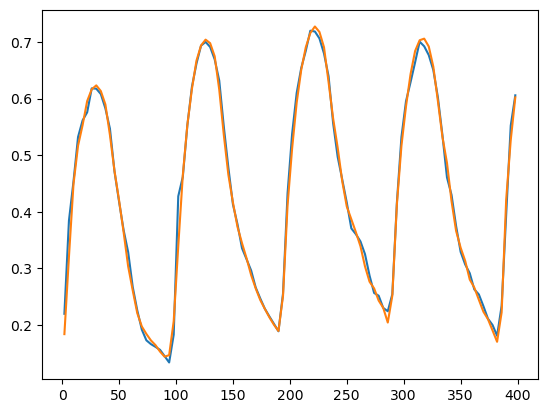

In [51]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][2:400:4])
plt.plot(train_results['Actuals'][2:400:4])

In [52]:

val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1.flatten()})
val_results

274/274 [==============================] - 1s 2ms/step


,Val Predictions,Actuals
0,0.120483,0.098332
1,0.038176,0.031974
2,0.120937,0.113234
3,0.437125,0.489292
4,0.427704,0.376303
...,...,...
35035,0.263865,0.294893
35036,0.074012,0.000000
35037,0.036330,0.000000
35038,0.145542,0.129559


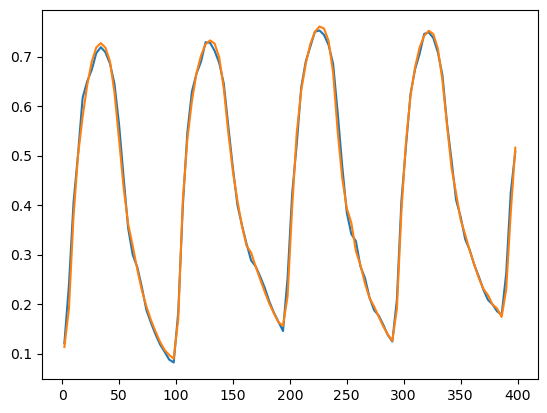

In [53]:
plt.plot(val_results['Val Predictions'][2:400:4])
plt.plot(val_results['Actuals'][2:400:4])

In [62]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1.flatten()})
test_results

274/274 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,0.178552,0.341072
1,0.129365,0.181534
2,0.151170,0.213963
3,0.214391,0.181219
4,0.554650,0.577188
...,...,...
35015,0.351349,0.375618
35016,0.008866,0.000000
35017,-0.001682,0.000000
35018,0.283254,0.278569


In [55]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=2, end=400):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end:4])
  plt.plot(df['Actuals'][start:end:4])
  return df, mse(predictions, y)

274/274 [==============================] - 0s 2ms/step


(       Predictions   Actuals
 0         0.178552  0.341072
 1         0.129365  0.181534
 2         0.151170  0.213963
 3         0.214391  0.181219
 4         0.554650  0.577188
 ...            ...       ...
 35015     0.351349  0.375618
 35016     0.008866  0.000000
 35017    -0.001682  0.000000
 35018     0.283254  0.278569
 35019     0.360063  0.385502
 
 [35020 rows x 2 columns],
 0.002177691711816463)

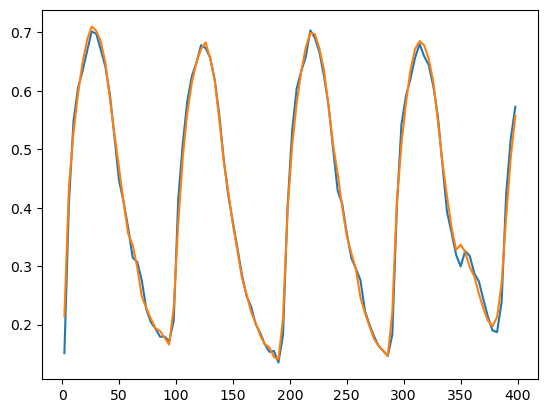

In [63]:
plot_predictions1(model1, X_test1, y_test1.flatten())

In [57]:
kkk = df_orignal_scaled[78886:78891,:]
print(kkk)

reshaped_array = np.reshape(kkk, (1, 5, 4))
predictions = model1.predict(reshaped_array)
print(predictions)
# predictions
# inverse_data = np.zeros((len(predictions), scaler.shape[1]))

[[0.         0.         0.30809309 0.37561779]
 [0.         0.         0.27856895 0.38550247]
 [0.         0.         0.25946509 0.3970346 ]
 [0.         0.         0.24175061 0.3970346 ]
 [0.         0.         0.22681487 0.3970346 ]]
1/1 [==============================] - 0s 17ms/step
[[0.05203395 0.01971317 0.21285409 0.3751494 ]]


In [58]:
input = kkk
output = []
output_not_scaled = []

for i in range(0,24):
    reshaped_array = np.reshape(input, (1, 5, 4))
    prediction = model1.predict(reshaped_array)
    original_scale_predictions = scaler.inverse_transform(prediction)
    np.append(input, prediction)
    np.delete(input, 0)
    output_not_scaled.append(prediction)
    output.append(original_scale_predictions)
print(output)
print(output_not_scaled)


1/1 [==============================] - 0s 16ms/step
[array([[60.023243 ,  1.701641 , 12.32807  ,  2.2771568]], dtype=float32), array([[60.023243 ,  1.701641 , 12.32807  ,  2.2771568]], dtype=float32), array([[60.023243 ,  1.701641 , 12.32807  ,  2.2771568]], dtype=float32), array([[60.023243 ,  1.701641 , 12.32807  ,  2.2771568]], dtype=float32), array([[60.023243 ,  1.701641 , 12.32807  ,  2.2771568]], dtype=float32), array([[60.023243 ,  1.701641 , 12.32807  ,  2.2771568]], dtype=float32), array([[60.023243 ,  1.701641 , 12.32807  ,  2.2771568]], dtype=float32), array([[60.023243 ,  1.701641 , 12.32807  ,  2.2771568]], dtype=float32), array([[60.023243 ,  1.701641 , 12.32807  ,  2.2771568]], dtype=float32), array([[60.023243 ,  1.701641 , 12.32807  ,  2.2771568]], dtype=float32), array([[60.023243 ,  1.701641 , 12.32807  ,  2.2771568]], dtype=float32), array([[60.023243 ,  1.701641 , 12.32807  ,  2.2771568]], dtype=float32), array([[60.023243 ,  1.701641 , 12.32807  ,  2.2771568]], d

In [59]:
print(df_orignal[78890:78915]['T2m'])

78890    12.73
78891    12.26
78892    11.84
78893    13.93
78894    19.21
78895    22.79
78896    25.30
78897    27.11
78898    28.31
78899    28.95
78900    29.21
78901    28.99
78902    28.18
78903    26.36
78904    23.34
78905    20.80
78906    18.78
78907    17.97
78908    17.16
78909    16.63
78910    16.46
78911    15.55
78912    14.75
78913    13.90
78914    13.25
Name: T2m, dtype: float64
